## Check HDF5 File
Utility notebook used when make_plots.py isn't working as expected.<br>
Open an HDF5 output of workflows/SUEP_coffea.py and check out its contents.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def h5load(ifile, label):
    with pd.HDFStore(ifile, 'r') as store:
        data = store[label] 
        metadata = store.get_storer(label).attrs.metadata
        return data, metadata

In [4]:
f = '../out.hdf5'
event_vars, m = h5load(f,'vars')

In [5]:
event_vars

,ntracks,ngood_fastjets,ht,HLT_PFHT1050,eta_ak4jets0,phi_ak4jets0,pt_ak4jets0,eta_ak4jets1,phi_ak4jets1,pt_ak4jets1,...,ISR_pt_avg_b_CO,ISR_pt_mean_scaled_CO,ISR_S1_CO,ISR_pt_avg_CO,ISR_rho0_CO,ISR_rho1_CO,ISR_pt_CO,ISR_eta_CO,ISR_phi_CO,ISR_mass_CO
0,332,2,1354.953125,True,-0.523804,1.479736,502.50,-0.330322,-1.603516,250.625,...,2.661892,0.084144,0.276520,6.305840,0.000000,0.109878,334.354218,-0.406136,1.364131,215.693627
1,368,2,2335.437500,True,-0.870972,-2.249512,816.00,0.062500,0.747314,645.000,...,1.286076,0.155364,0.384814,5.098483,0.472551,11.802553,163.755539,-0.821044,-2.291757,67.055103
2,291,2,1539.687500,True,1.204834,3.003906,697.50,0.833862,0.057838,249.125,...,3.216059,0.130144,0.696860,13.006048,0.000000,0.897963,401.603790,1.179585,3.058251,143.996912
3,264,1,1218.593750,True,0.900269,-1.094971,432.75,1.186768,-0.588623,260.500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,378,3,2249.265625,True,-0.010775,2.590820,736.50,-1.665771,-0.299805,380.750,...,1.801748,0.139193,0.353640,7.555636,0.000000,6.155261,261.958313,-1.569801,-0.253148,173.549105


In [6]:
for key in event_vars:
    print(key)

ntracks
ngood_fastjets
ht
HLT_PFHT1050
eta_ak4jets0
phi_ak4jets0
pt_ak4jets0
eta_ak4jets1
phi_ak4jets1
pt_ak4jets1
eta_ak4jets2
phi_ak4jets2
pt_ak4jets2
eta_ak4jets3
phi_ak4jets3
pt_ak4jets3
eta_ak4jets4
phi_ak4jets4
pt_ak4jets4
eta_ak4jets5
phi_ak4jets5
pt_ak4jets5
eta_ak4jets6
phi_ak4jets6
pt_ak4jets6
eta_ak4jets7
phi_ak4jets7
pt_ak4jets7
eta_ak4jets8
phi_ak4jets8
pt_ak4jets8
eta_ak4jets9
phi_ak4jets9
pt_ak4jets9
ngood_ak4jets
ngood_tracker_ak4jets
n_loose_ak4jets
n_tight_ak4jets
ht_loose
ht_tight
ht_tracker
Pileup_nTrueInt
PV_npvs
PV_npvsGood
resnet_SUEP_pred_model125
resnet_SUEP_pred_model126
resnet_SUEP_pred_model127
resnet_SUEP_pred_model128
resnet_SUEP_pred_model129
resnet_SUEP_pred_model130
resnet_SUEP_pred_model131
resnet_SUEP_pred_model132
resnet_SUEP_pred_model133
resnet_SUEP_pred_model134
resnet_SUEP_pred_model135
SUEP_dphi_SUEP_ISR_IRM
SUEP_nconst_IRM
SUEP_pt_avg_b_IRM
SUEP_pt_mean_scaled_IRM
SUEP_S1_IRM
SUEP_pt_avg_IRM
SUEP_rho0_IRM
SUEP_rho1_IRM
SUEP_pt_IRM
SUEP_eta_IRM


In [8]:
event_vars['resnet_SUEP_pred_model126']

0    0.999991
1    1.000000
2    0.999988
3    0.999999
4    1.000000
Name: resnet_SUEP_pred_model126, dtype: float32

In [33]:
jets = event_vars['ngood_fastjets']
htloose = event_vars['ht_loose']
httight = event_vars['ht_tight']

(array([1.4600e+02, 0.0000e+00, 4.4440e+03, 0.0000e+00, 3.6554e+04,
        0.0000e+00, 2.6530e+03, 0.0000e+00, 7.7000e+01, 2.0000e+00]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

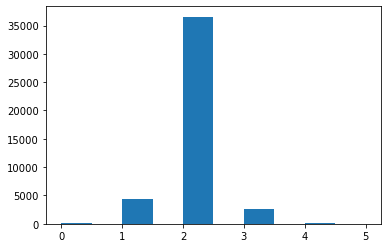

In [34]:
plt.hist(jets)

64909205.15625
64774388.28125


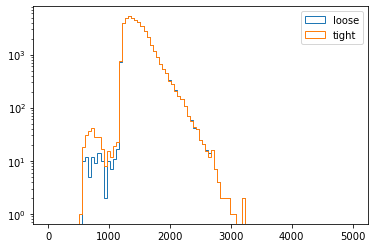

In [35]:
plt.hist(htloose, bins=np.linspace(0,5000,100),  histtype='step', label='loose')
plt.hist(httight, bins=np.linspace(0,5000,100), histtype='step', label='tight')
plt.yscale('log')
plt.legend()
print(np.sum(htloose))
print(np.sum(httight))